# **Inteligencia artificial**
# Entrenamiento de una Red Convolusional

**Modelo:** 2 **Grupo:** 002 **Hora:** V4-V6 

**Integrantes:**

Paulina Merari Acosta Sanchez

Sofía Raquel Cantú Maltos

Paola Daresi Navarro Leal

David Lázaro Tristán

Victoria Fernandez Peña

Angélica López Márquez

# Importar librerías y descargar Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Construir modelo

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.SpatialDropout2D(0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(layers.Dense(20, activation='softmax'))



# Añadir callbacks

In [ ]:
earlyStop = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=9)
reduceLR = callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=4, factor=0.5, min_lr=1e-6,verbose=1)



# Entrenar modelo

In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=15, callbacks=[earlyStop, reduceLR], shuffle=True,
                    validation_data=(test_images, test_labels))

Epoch 1/15
782/782 [==============================] - 72s 87ms/step - loss: 2.2208 - accuracy: 0.3190 - val_loss: 2.1032 - val_accuracy: 0.3522
Epoch 2/15
782/782 [==============================] - 65s 83ms/step - loss: 1.8451 - accuracy: 0.4269 - val_loss: 1.7584 - val_accuracy: 0.4561
Epoch 3/15
782/782 [==============================] - 67s 86ms/step - loss: 1.6205 - accuracy: 0.4911 - val_loss: 1.5913 - val_accuracy: 0.5059
Epoch 4/15
782/782 [==============================] - 68s 87ms/step - loss: 1.4226 - accuracy: 0.5513 - val_loss: 1.4465 - val_accuracy: 0.5477
Epoch 5/15
782/782 [==============================] - 68s 87ms/step - loss: 1.2562 - accuracy: 0.6036 - val_loss: 1.4121 - val_accuracy: 0.5584
Epoch 6/15
782/782 [==============================] - 68s 86ms/step - loss: 1.1042 - accuracy: 0.6464 - val_loss: 1.4522 - val_accuracy: 0.5554
Epoch 7/15
782/782 [==============================] - 67s 85ms/step - loss: 0.9547 - accuracy: 0.6936 - val_loss: 1.3120 - val_accuracy:

# Validar modelo

313/313 - 4s - loss: 1.3858 - accuracy: 0.6476
0.647599995136261


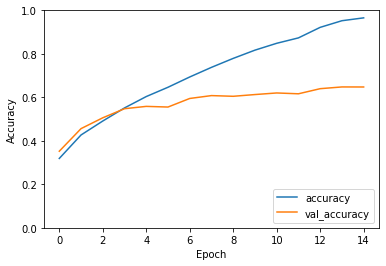

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)